In [1]:
# Bibliotecas python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import re
%matplotlib inline

# Função para calcular moda.
from scipy import stats

# Formatação dos gráficos
from matplotlib.ticker import FuncFormatter
from matplotlib.legend import Legend

In [2]:
# Configurando o tema do gráfico
myrcs = {"axes.titleweight": "bold", "lines.markersize": 9.0, "lines.linewidth": 2.0,}
sns.set (style="whitegrid", font_scale=1.25, rc=myrcs)

# Linhas exibidas por padrão nos dataframes
pd.options.display.min_rows = 20

In [3]:
#Configurações
# A - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)
    #A2 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 2)
    #A3 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 3)
    #A4 - com switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 4)
    
# B - sem switch HW, podendo aumentar/diminuir número de switches SW (número máximo de SW = 5)

# C - com switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 1)

# D - com switch HW, não podendo aumentar/diminuir número de switches SW (número de SW fixo em 5)

#Renomear C->A1 e A->A5

#Novos gráficos com média (intervalo estavel):
#Uso médio de tabelas e CPU (para HW e SW)
#Vazao total, bloqueio, atraso, número médio de switches, load drops
#Eixo x -> maxSW por experimento
#Eixo y -> valor
#Hue -> cargas

#Falta rodar:
#A1 até A5, com seed 3 e 4 para todas as cargas

# Parâmetros que variam nesta simulação
seeds = [1,2]
cargas = ["50hosts", "100hosts", "150hosts"]
experimentos = ["a","b","c","d"]

# Tempo total de simulação
t_sim = 2000

In [4]:
# Função para ler os arquivos de log
def mymode (series):
    return stats.mode (series)[0]

agg_map = {'SwAtivosAntes' : mymode, 'SwAtivosDepois' : np.mean, 'AvgCPULoad' : np.mean}

def read_dataframe ():
    df_carga = []
    for carga in cargas:
        df_exp = []
        for experimento in experimentos:
            df_sed = []
            for seed in seeds:
                df = pd.read_csv ("saidas/"+carga+"/seed"+str(seed)+"/"+experimento+"-"+carga+"-"+str(seed)+"-logDecisaoSwitchesSW.log", sep='\s+', index_col=["TimeSec"])
                df_sed.append (df)
            #df_carga.append (pd.concat (df_sed).groupby (["TimeSec"]).agg (agg_map))
            df_exp.append(pd.concat (df_sed, keys=seeds))
        df_carga.append (pd.concat (df_exp, keys=experimentos))
    df_read = pd.concat (df_carga, keys=cargas, names=["Carga","Experimento","Seed","TimeSec"], copy=False)
    return df_read

In [5]:
df_plot = read_dataframe()
df_plot

SwAtivosAntes  AvgCPULoad  Decisão  \
Carga    Experimento Seed TimeSec                                       
50hosts  a           1    15.0                 1       0.179  Manteve   
                          30.0                 1       0.380  Manteve   
                          45.0                 1       0.166  Manteve   
                          60.0                 1       0.605  Manteve   
                          75.0                 1       0.631  Manteve   
                          90.0                 1       0.818  Manteve   
                          105.0                1       0.644  Manteve   
                          120.0                1       0.776  Manteve   
                          135.0                1       0.535  Manteve   
                          150.0                1       0.634  Manteve   
...                                          ...         ...      ...   
150hosts d           2    1860.0               5       0.000  Manteve   
                          1875.0               5       0.000  Manteve   
                          1890.0               5       0.000  Manteve   
                          1905.0               5       0.000  Manteve   
                          1920.0               5       0.000  Manteve   
                          1935.0               5       0.000  Manteve   
                          1950.0               5       0.000  Manteve   
                          1965.0               5       0.000  Manteve   
                          1980.0               5       0.000  Manteve   
                          1995.0               5       0.000  Manteve   

                                   SwAtivosDepois  
Carga    Experimento Seed TimeSec                  
50hosts  a           1    15.0                  1  
                          30.0                  1  
                          45.0                  1  
                          60.0                  1  
                          75.0                  1  
                          90.0                  1  
                          105.0                 1  
                          120.0                 1  
                          135.0                 1  
                          150.0                 1  
...                                           ...  
150hosts d           2    1860.0                5  
                          1875.0                5  
                          1890.0                5  
                          1905.0                5  
                          1920.0                5  
                          1935.0                5  
                          1950.0                5  
                          1965.0                5  
                          1980.0                5  
                          1995.0                5  

[3204 rows x 4 columns]

In [6]:
df_teste = df_plot.query("TimeSec > 200 and TimeSec < 400").groupby(["Carga", "Experimento", "Seed"]).mean()
df_teste.reset_index(inplace=True)
df_teste.replace({"Experimento":{"a":1,"b":2,"c":3,"d":4}}, inplace=True)
df_teste

,Carga,Experimento,Seed,SwAtivosAntes,AvgCPULoad,SwAtivosDepois
0,50hosts,1,1,1.000000,0.504154,1.000000
1,50hosts,1,2,1.000000,0.519538,1.000000
2,50hosts,2,1,3.000000,0.622462,3.000000
3,50hosts,2,2,3.000000,0.612538,3.000000
4,50hosts,3,1,1.000000,0.516769,1.000000
5,50hosts,3,2,1.000000,0.548538,1.000000
6,50hosts,4,1,5.000000,0.103308,5.000000
7,50hosts,4,2,5.000000,0.109769,5.000000
8,100hosts,1,1,3.000000,0.608846,3.000000
9,100hosts,1,2,3.000000,0.610154,3.000000


Text(0.5, 1.05, 'Uso do switch')

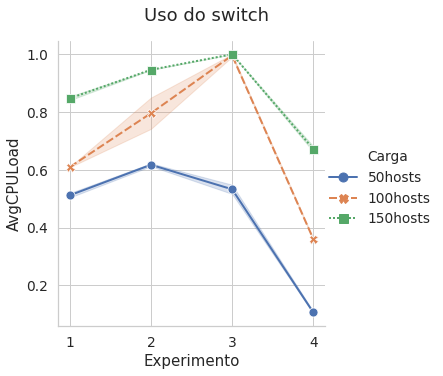

In [7]:
snsplt = sns.relplot(x="Experimento", y="AvgCPULoad",
            hue="Carga",
            kind="line", legend="full", data=df_teste, ci=95, style="Carga", markers=True)
snsplt.fig.suptitle('Uso do switch', y=1.05)
#snsplt.set(xlim=(0,1000))